# Tarefa 2 - Support Vector Machine para o Hippocampus

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import random

In [2]:
def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo

# Fixar a seed
set_seed(2023)

In [3]:
data_treino = pd.read_csv('./data_mod_hippo/dataset_treino.csv', na_filter=False)
data_teste = pd.read_csv('./data_mod_hippo/dataset_teste.csv', na_filter=False)

In [4]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 1911 entries, diagnostics_Image-original_Mean to com_z
dtypes: float64(1892), int64(18), object(1)
memory usage: 4.4+ MB


In [5]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 1910 entries, diagnostics_Image-original_Mean to com_z
dtypes: float64(1889), int64(21)
memory usage: 1.5 MB


## Conversão de dados do tipo 64 para 32

In [6]:
float_features = data_treino.select_dtypes(include='float')
int_features = data_treino.select_dtypes(include='int')

data_treino[float_features.columns] = data_treino[float_features.columns].astype(np.float32)
data_treino[int_features.columns] = data_treino[int_features.columns].astype(np.int32)
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 1911 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(1892), int32(18), object(1)
memory usage: 2.2+ MB


In [7]:
float_features = data_teste.select_dtypes(include='float')
int_features = data_teste.select_dtypes(include='int')

data_teste[float_features.columns] = data_teste[float_features.columns].astype(np.float32)
data_teste[int_features.columns] = data_teste[int_features.columns].astype(np.int32)
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 1910 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(1889), int32(21)
memory usage: 746.2 KB


## Normalização de Dados

In [8]:
from sklearn.preprocessing import MinMaxScaler
data_treino_normalize = data_treino.copy()
data_teste_normalize = data_teste.copy()

X_scale = data_treino_normalize.drop(columns=['Transition'])

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_scale)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(data_teste_normalize)
X_scale = pd.DataFrame(scaler_X.transform(X_scale[X_scale.columns]), columns=X_scale.columns)
data_teste_normalize = pd.DataFrame(scaler_y.transform(data_teste_normalize[data_teste_normalize.columns]), columns=data_teste_normalize.columns)

data_treino_normalize = pd.concat([X_scale, data_treino_normalize['Transition']], axis=1)

data_treino_normalize.head()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,bbox_x1,bbox_y1,bbox_x2,bbox_y2,bbox_x3,bbox_y3,com_x,com_y,com_z,Transition
0,0.468027,0.393701,0.598392,0.555087,0.455539,0.392720,0.289560,0.310620,0.254940,0.562431,...,0.769231,0.269841,0.571429,0.263158,0.68,0.250000,0.723281,0.308972,0.578513,CN-CN
1,0.281221,0.488189,0.713552,0.588970,0.397306,0.338081,0.311579,0.359443,0.335667,0.619620,...,0.205128,0.492063,0.571429,0.842105,0.12,0.333333,0.276666,0.419646,0.571849,CN-CN
2,0.764980,0.212598,0.530116,0.727218,0.876712,1.000000,0.431089,0.622046,0.583960,0.932585,...,0.102564,0.365079,0.285714,0.947368,0.68,0.666667,0.165689,0.419660,0.608489,AD-AD
3,0.651078,0.338583,0.799452,0.547963,0.355153,0.372946,0.453707,0.555160,0.498358,0.760667,...,0.512821,0.095238,0.357143,0.526316,0.64,0.541667,0.553885,0.113744,0.625148,CN-MCI
4,0.382225,0.173228,0.406742,0.504096,0.080905,0.078060,0.545945,0.447539,0.424594,0.566272,...,0.358974,0.365079,0.428571,0.473684,0.56,0.416667,0.312799,0.360217,0.540829,CN-CN


## Conversão de dados do tipo 64 para 32 depois da normalização

In [9]:
float_features = data_treino_normalize.select_dtypes(include='float')
int_features = data_treino_normalize.select_dtypes(include='int')

data_treino_normalize[float_features.columns] = data_treino_normalize[float_features.columns].astype(np.float32)
data_treino_normalize[int_features.columns] = data_treino_normalize[int_features.columns].astype(np.int32)
data_treino_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 1911 entries, diagnostics_Image-original_Mean to Transition
dtypes: float32(1910), object(1)
memory usage: 2.2+ MB


In [10]:
float_features = data_teste_normalize.select_dtypes(include='float')
int_features = data_teste_normalize.select_dtypes(include='int')

data_teste_normalize[float_features.columns] = data_teste_normalize[float_features.columns].astype(np.float32)
data_teste_normalize[int_features.columns] = data_teste_normalize[int_features.columns].astype(np.int32)
data_teste_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 1910 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(1910)
memory usage: 746.2 KB


## Split Data

In [11]:
from sklearn.model_selection import train_test_split

X_treino = data_treino_normalize.drop(columns=['Transition'])
y_treino = data_treino_normalize['Transition']

X_teste = data_teste_normalize

X_train, X_test, y_train, y_test = train_test_split(X_treino, y_treino, test_size=0.2, random_state=2023, stratify = y_treino)

## Feature Selection

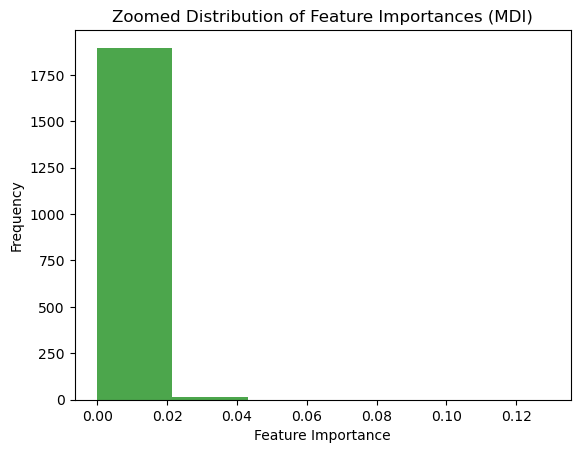

Features com importância MDI - 0: 1851


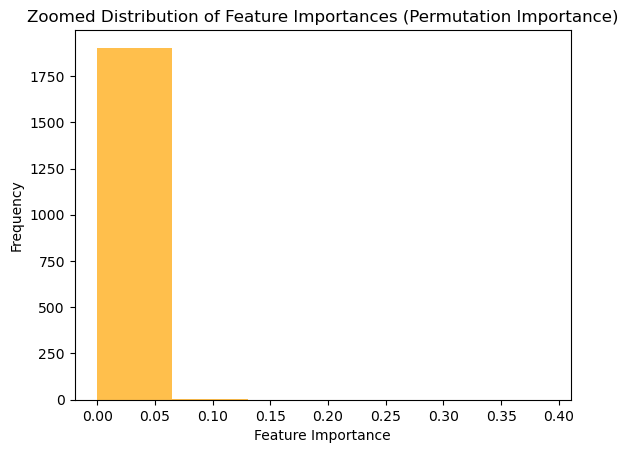

Features com importância Permutation - 0: 1851


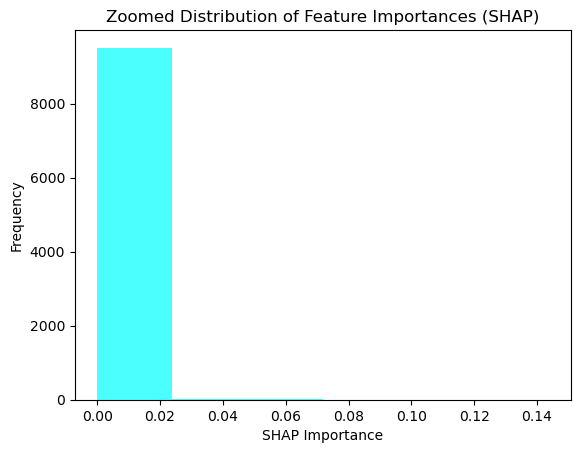

Features com importância SHAP - 0: 1861
Features a serem removidas (comuns a todas as abordagens): 1805


In [12]:
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=2023)
model.fit(X_treino, y_treino)

### 1. Feature Importance baseado em Mean Decrease in Impurity (MDI)
mdi_importances = model.feature_importances_

plt.hist(mdi_importances, bins=6, range=(0, max(mdi_importances)), color='green', alpha=0.7)
plt.xlabel("Feature Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (MDI)")
plt.show()

# Identificar features com importância MDI menor ou igual ao limite
mdi_threshold = 0
features_mdi = [feature for feature, importance in zip(X_treino.columns, mdi_importances) if importance == mdi_threshold]
print(f"Features com importância MDI - {mdi_threshold}: {len(features_mdi)}")

### 2. Feature Importance baseado em Permutation Importance
perm_importance = permutation_importance(model, X_treino, y_treino, n_repeats=5, random_state=2023, n_jobs = -1)
perm_importances = perm_importance.importances_mean

plt.hist(perm_importances, bins=6, range=(0, max(perm_importances)), color='orange', alpha=0.7)
plt.xlabel("Feature Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (Permutation Importance)")
plt.show()

# Identificar features com importância de Permutation menor ou igual ao limite
perm_threshold = 0
features_perm = [feature for feature, importance in zip(X_treino.columns, perm_importances) if importance == perm_threshold]
print(f"Features com importância Permutation - {perm_threshold}: {len(features_perm)}")

### 3. Feature Importance baseado em SHAP
# Criar valores SHAP para o modelo
explainer = shap.TreeExplainer(model, X_treino)
shap_values = explainer(X_treino, check_additivity=False)

# Calcular a média dos valores absolutos de SHAP para cada feature
shap_importances = np.abs(shap_values.values).mean(axis=0)

# Garantir que shap_importances seja uma lista ou array unidimensional
shap_importances = np.array(shap_importances).flatten()

plt.hist(shap_importances, bins=6, range=(0, max(shap_importances)), color='cyan', alpha=0.7)
plt.xlabel("SHAP Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (SHAP)")
plt.show()

# Identificar features com importância SHAP menor ou igual ao limite
shap_threshold = 0
features_shap = [feature for feature, importance in zip(X_treino.columns, shap_importances) if importance == shap_threshold]
print(f"Features com importância SHAP - {shap_threshold}: {len(features_shap)}")

### 4. Combinação de todas as abordagenspermutat
features_to_drop = list(
    set(features_mdi).intersection(set(features_perm)).intersection(set(features_shap))
)
print(f"Features a serem removidas (comuns a todas as abordagens): {len(features_to_drop)}")

In [13]:
### Remover as features identificadas
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)
X_treino = X_treino.drop(columns=features_to_drop)
X_teste = X_teste.drop(columns=features_to_drop)

print(f"Conjunto de treino reduzido: {X_treino.shape}")
print(f"Conjunto de teste reduzido: {X_teste.shape}")
print(f"Conjunto de treino reduzido: {X_train.shape}")
print(f"Conjunto de teste reduzido: {X_test.shape}")

Conjunto de treino reduzido: (305, 105)
Conjunto de teste reduzido: (100, 105)
Conjunto de treino reduzido: (244, 105)
Conjunto de teste reduzido: (61, 105)


## Grid Search

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.239 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.324 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.338 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.304 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.274 total time=   0.0s
Best estimator:  SVC(C=1, gamma=0.1, kernel='linear', random_state=2023)
              precision    recall  f1-score   support

       AD-AD       0.39      0.58      0.47        12
       CN-CN       0.52      0.63      0.57        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.22      0.14      0.17        14
     MCI-MCI       0.36      0.29      0.32        14

    accuracy                           0.41        61
   macro avg       0.30      0.33      0.31        61
weighted avg       0.37      

/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dbarr0s/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

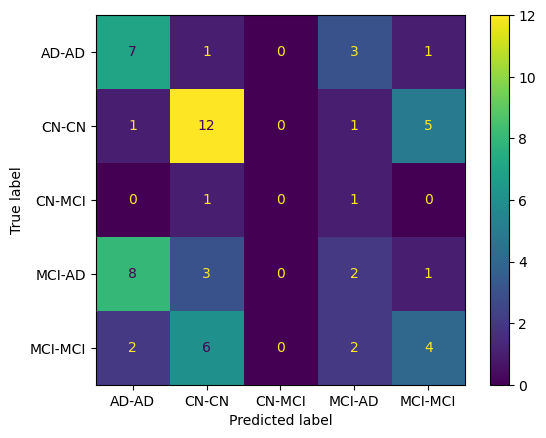

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=2023)

param_grid = {
    'C': [1],
    'gamma': [0.1],
    'kernel': ['linear'],
    #'class_weight': [None, 'balanced'], # Important for imbalanced datasets
}

grid_searchSVC = GridSearchCV(svc, param_grid, cv=5, refit=True, verbose=3, scoring = 'f1_macro')
grid_searchSVC.fit(X_train, y_train)
grid_predictionSVC = grid_searchSVC.predict(X_test)

print("Best estimator: ", grid_searchSVC.best_estimator_)

print(classification_report(y_test, grid_predictionSVC))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionSVC)
plt.show()

## Support Vector Machine

In [26]:
from sklearn.svm import SVC

svc = SVC(C=1, gamma=0.1, kernel = 'linear', random_state=2023)  # 0.37128

svc.fit(X_treino, y_treino)
predictionSVC = svc.predict(X_teste)

In [27]:
with open('results_SVC.csv', 'w') as results:
    results.write('RowId,Result\n')
    i = 1
    for p in predictionSVC:
        results.write(f'{i},{p}\n')
        i+=1